# Bài Tập Lớn Machine Learning : Dự đoán giá vé máy bay

## 1. Tổng quan dataset
Dataset “Flight Fare Prediction MH” thường được sử dụng trong các bài toán dự đoán giá vé máy bay (Flight Fare Regression).  
Dataset có 2 phần:
- **Training set**: chứa toàn bộ feature + cột giá vé `Price`.
- **Test set**: chỉ chứa feature, không có giá, dùng để dự đoán.

Training set phổ biến có khoảng **10,683 dòng dữ liệu**.

---

## 2. Các cột (features) trong dataset

| Cột | Ý nghĩa |
|-----|--------|
| Airline | Hãng hàng không |
| Date_of_Journey | Ngày bay |
| Source | Điểm xuất phát |
| Destination | Điểm đến |
| Route | Hành trình (các trạm nối chuyến) |
| Dep_Time | Thời gian khởi hành |
| Arrival_Time | Thời gian hạ cánh |
| Duration | Tổng thời gian bay |
| Total_Stops | Số điểm dừng |
| Additional_Info | Thông tin phụ |
| Price | Giá vé (chỉ có ở training set) |

---

## 3. Mục tiêu sử dụng
- Dự đoán giá vé máy bay dựa trên thông số chuyến bay.  
- Áp dụng các thuật toán Regression như Linear Regression, Random Forest.

---

## 4. Lưu ý quan trọng
- Dataset **không chứa** thông tin **thời điểm đặt vé (booking date)**.  
  Vì vậy không thể dùng để dự đoán sự biến động giá theo thời gian đặt vé.
- Chủ yếu phù hợp cho mô hình ML dự đoán giá vé tại thời điểm thu thập dữ liệu.

---

## 5. Các bước xử lý dữ liệu thường dùng
1. Chuyển đổi Date_of_Journey → Day, Month, Year  
2. Convert Dep_Time, Arrival_Time → hour, minute  
3. Xử lý Duration thành tổng số phút hoặc giờ  
4. Encode các biến phân loại: Airline, Source, Destination, Total_Stops  
5. Train/Test split và xây dựng mô hình Regression



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings

In [5]:
# Đọc dữ liệu
df = pd.read_excel('Data_Train.xlsx')
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
# hiển thị 5 dòng đầu
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
# hiển thị 5 dòng cuối
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [8]:
#  hiển thị thông tin dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# thống kê dữ liệu 
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [10]:
# kiểm tra missing 
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

# Tiền xử lý

In [11]:
def process_data(data):
    df = data.copy()
    
    # --- 1. LỌC NGOẠI LAI (Outlier Removal) ---
    # Bước này cực quan trọng để Linear Regression hoạt động tốt
    # Loại bỏ các vé giá trên 50.000 INR và hãng Business
    df = df[df['Price'] < 50000]
    df = df[df['Airline'] != 'Jet Airways Business']
    
    # --- 2. XỬ LÝ SƠ BỘ ---
    df.dropna(inplace=True)
    df['Destination'] = df['Destination'].replace('New Delhi', 'Delhi')
    df['Additional_Info'] = df['Additional_Info'].replace('No info', 'No Info')

    # --- 3. XỬ LÝ THỜI GIAN (Date) ---
    df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], format='%d/%m/%Y')
    df['Day'] = df['Date_of_Journey'].dt.day
    df['Month'] = df['Date_of_Journey'].dt.month
    df['Weekday'] = df['Date_of_Journey'].dt.weekday
    df.drop('Date_of_Journey', axis=1, inplace=True)

    # --- 4. XỬ LÝ GIỜ (Time) ---
    df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
    df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute
    df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_Min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
    df.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

    # --- 5. XỬ LÝ DURATION (Đổi ra phút) ---
    def convert_duration(duration):
        parts = duration.split()
        hours = 0
        mins = 0
        for part in parts:
            if 'h' in part:
                hours = int(part.replace('h', ''))
            elif 'm' in part:
                mins = int(part.replace('m', ''))
        return hours * 60 + mins

    df['Duration_Min'] = df['Duration'].apply(convert_duration)
    df.drop('Duration', axis=1, inplace=True)

    # --- 6. XỬ LÝ BIẾN PHÂN LOẠI (Encoding) ---
    # Label Encoding cho Total_Stops (Có thứ tự)
    stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
    df['Total_Stops'] = df['Total_Stops'].map(stop_mapping).fillna(1)

    # Bỏ cột thừa
    df.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

    # One-Hot Encoding cho các biến còn lại
    # drop_first=True giúp Linear Regression không bị lỗi đa cộng tuyến
    df = pd.get_dummies(df, columns=['Airline', 'Source', 'Destination'], drop_first=True)
    
    return df

# Chạy hàm xử lý
df_clean = process_data(df)
print("Kích thước sau khi làm sạch:", df_clean.shape)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\4015436062.py:23: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\4015436062.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dep_Min'] = pd.to_datetime(df['Dep_Time']).dt.minute
C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\4015436062.py:25: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\4015436062.

Kích thước sau khi làm sạch: (10673, 28)


# Trực Quan Hóa

Text(0.5, 1.0, 'Phân phối giá vé (Bị lệch phải)')

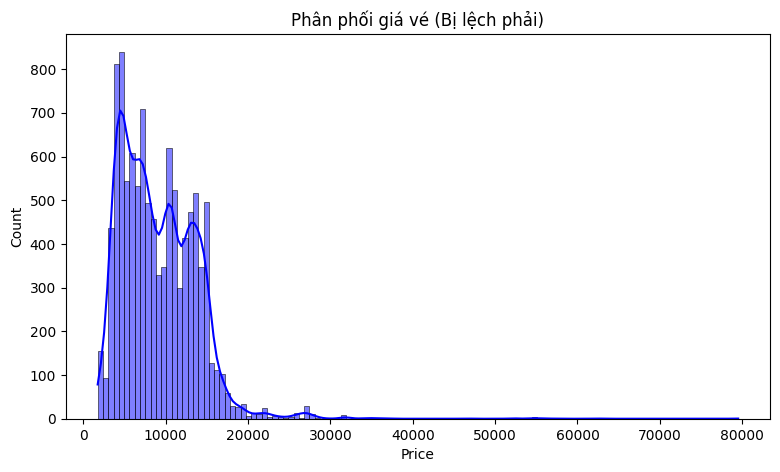

In [12]:
# # Cài đặt kích thước biểu đồ
plt.figure(figsize=(20,5))

# Biểu đồ 1: Phân phối giá vé
plt.subplot(1, 2, 1)
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Phân phối giá vé (Bị lệch phải)')

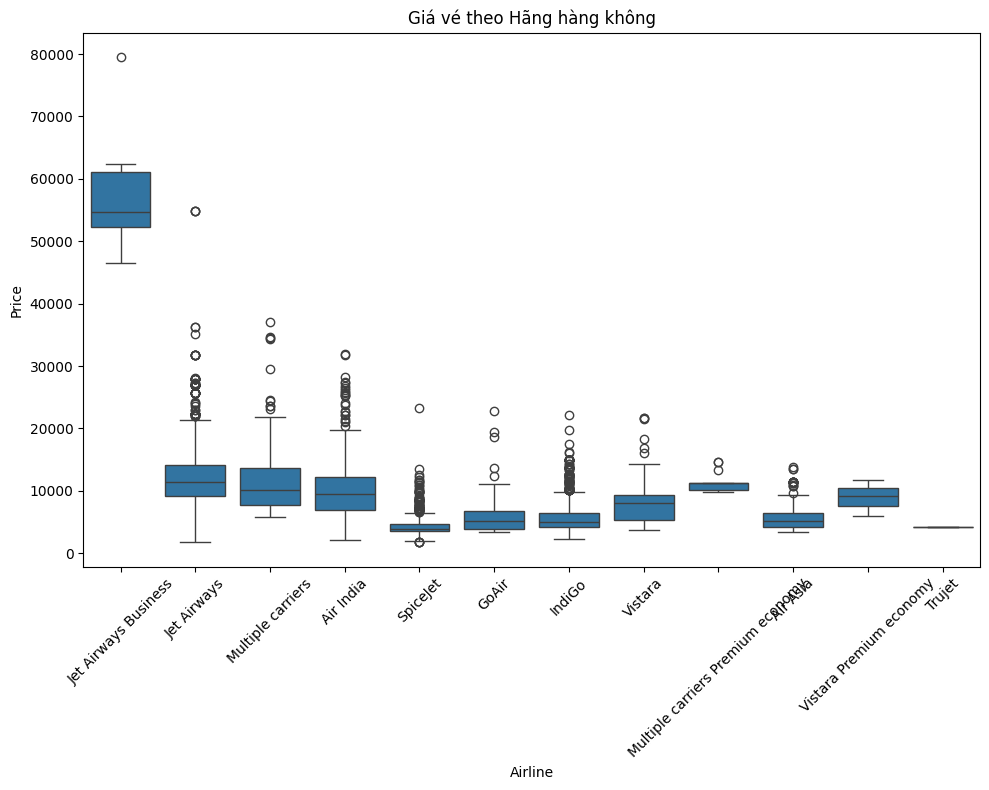

In [13]:
plt.figure(figsize=(10, 8))

# Biểu đồ 2: Giá vé theo Hãng bay (Dùng data gốc để vẽ cho dễ nhìn tên)
sns.boxplot(x='Airline', y='Price', data=df.sort_values('Price', ascending=False))
plt.xticks(rotation=45)
plt.title('Giá vé theo Hãng hàng không')
plt.tight_layout()


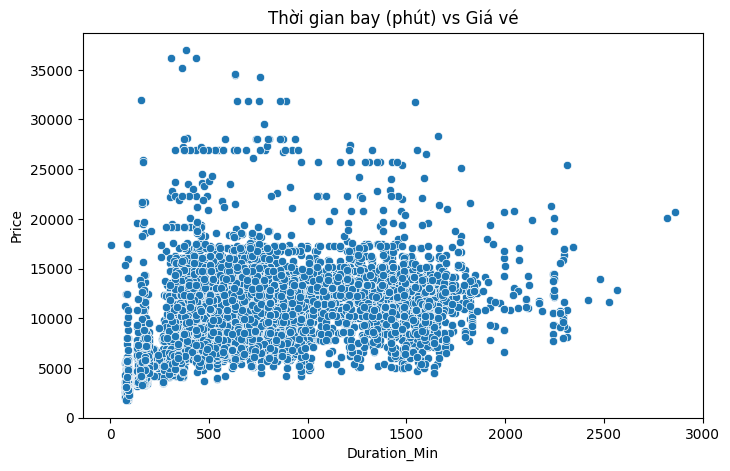

In [14]:
# Biểu đồ 3: Tương quan giữa Thời gian bay và Giá
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Duration_Min', y='Price', data=df_clean)
plt.title('Thời gian bay (phút) vs Giá vé')
plt.show()

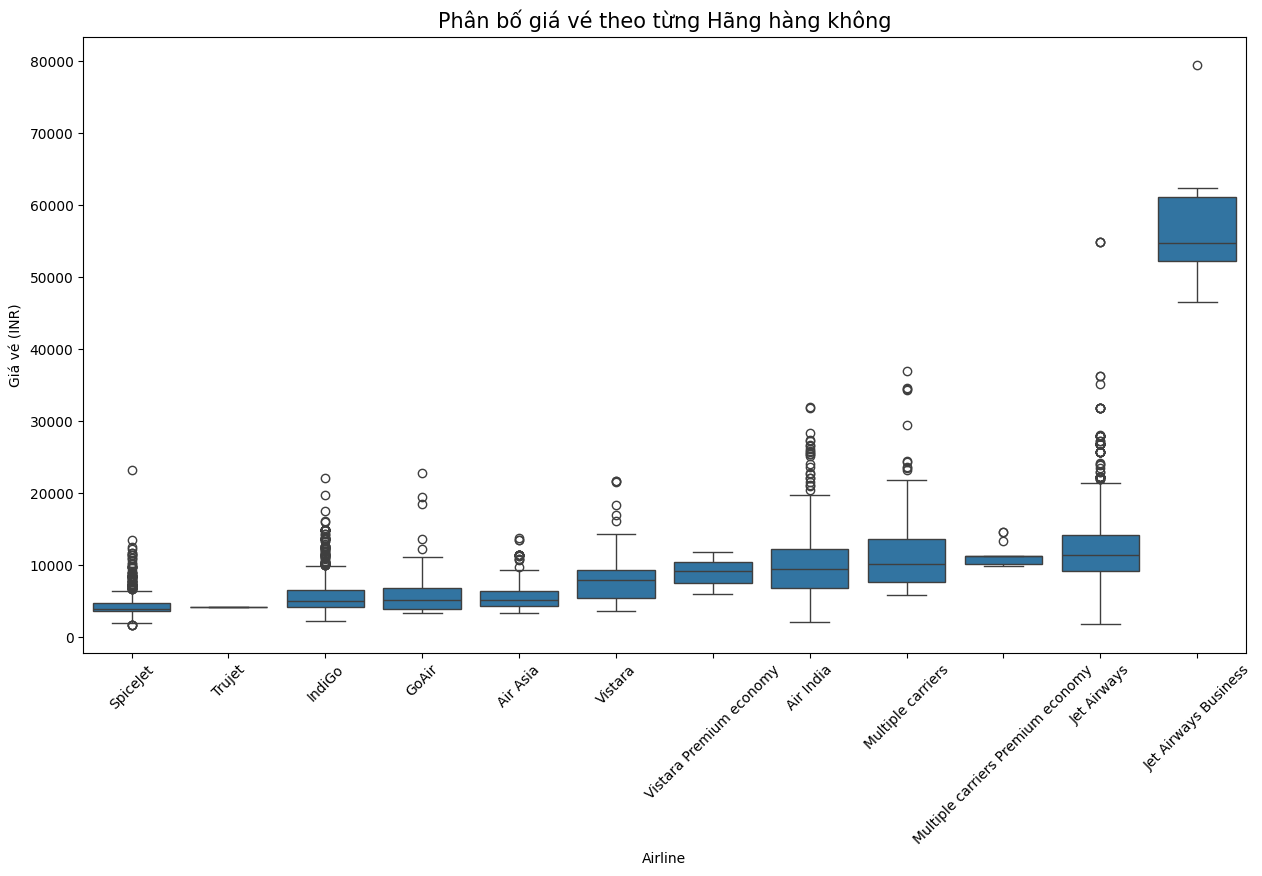

In [15]:
plt.figure(figsize=(15, 8))
# Sắp xếp các hãng theo giá trung vị (median) tăng dần để biểu đồ đẹp và dễ nhìn hơn
sorted_airlines = df.groupby('Airline')['Price'].median().sort_values().index

sns.boxplot(x='Airline', y='Price', data=df, order=sorted_airlines)
plt.title('Phân bố giá vé theo từng Hãng hàng không', fontsize=15)
plt.xticks(rotation=45) # Xoay tên hãng cho dễ đọc
plt.ylabel('Giá vé (INR)')
plt.show()

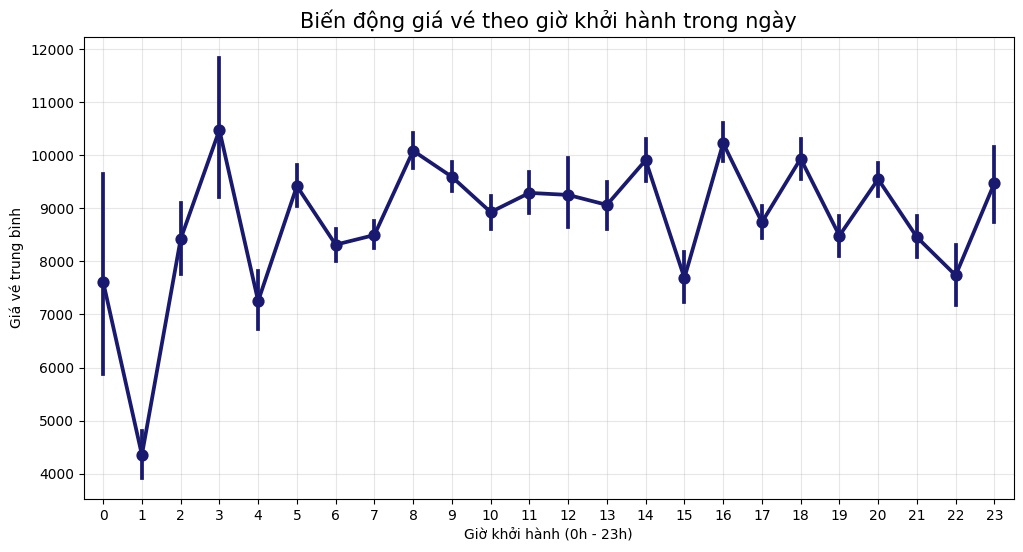

In [16]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Dep_Hour', y='Price', data=df_clean, color='midnightblue')
plt.title('Biến động giá vé theo giờ khởi hành trong ngày', fontsize=15)
plt.xlabel('Giờ khởi hành (0h - 23h)')
plt.ylabel('Giá vé trung bình')
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10388\2088193827.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Month', y='Price', data=df_clean, estimator=np.mean, palette='coolwarm')


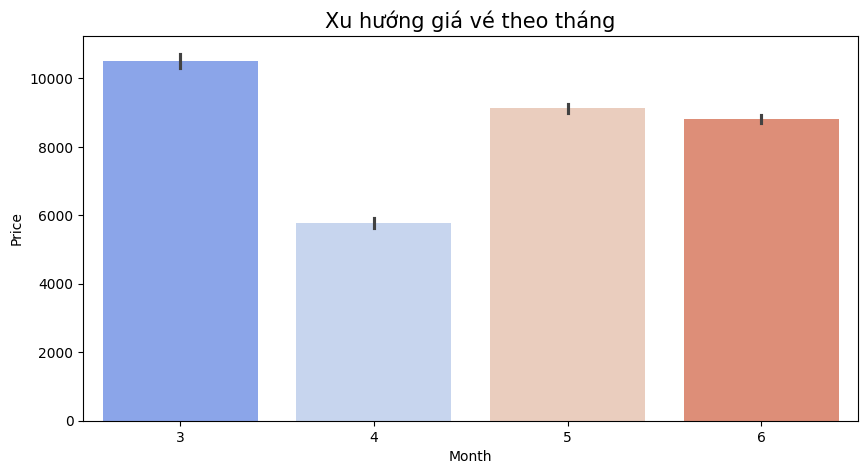

In [17]:
plt.figure(figsize=(10, 5))
# Đếm số chuyến bay hoặc xem giá trung bình theo tháng
sns.barplot(x='Month', y='Price', data=df_clean, estimator=np.mean, palette='coolwarm')
plt.title('Xu hướng giá vé theo tháng', fontsize=15)
plt.show()

# Chuẩn bị dữ liệu train và test

In [18]:
# 1. Tách Features và Target
X = df_clean.drop('Price', axis=1)
y = df_clean['Price']

# 2. Log Transformation cho y (Kỹ thuật "hack" điểm số cho bài toán giá tiền)
y_log = np.log1p(y)

# 3. Chia tập Train/Test
X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

# 4. Feature Scaling (Bắt buộc cho Linear Regression)
scaler = StandardScaler()
# Chỉ scale các cột số
num_cols = ['Duration_Min', 'Day', 'Month', 'Weekday', 
            'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Total_Stops']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Dữ liệu đã sẵn sàng!")

Dữ liệu đã sẵn sàng!


In [19]:
# --- MODEL 1: LINEAR REGRESSION ---
lr = LinearRegression()
lr.fit(X_train, y_train_log)
y_pred_lr_log = lr.predict(X_test)
y_train_lr_log = lr.predict(X_train) 



In [20]:
# --- MODEL 2: RANDOM FOREST (OPTIMIZED) ---
rf = RandomForestRegressor(
    n_estimators=700,      
    max_depth=20,           
    min_samples_split=5,    
    min_samples_leaf=2,     
    max_features=None,      
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train_log)
y_pred_rf_log = rf.predict(X_test)
y_train_rf_log = rf.predict(X_train) 

In [21]:
# Hàm tính toán tất cả các chỉ số
def calculate_metrics(model_name, mode, y_true_log, y_pred_log):
    # 1. Đảo ngược Log để về giá tiền thực tế (Rupees)
    y_true = np.expm1(y_true_log)
    y_pred = np.expm1(y_pred_log)
    
    # 2. Tính toán các chỉ số
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Mode': mode,
        'R2 Score': r2,
        'MAE (Sai số tuyệt đối)': mae,
        'MSE (Bình phương lỗi)': mse,
        'RMSE (Độ lệch chuẩn)': rmse
    }

# --- TÍNH TOÁN CHO LINEAR REGRESSION ---
y_train_pred_lr = lr.predict(X_train)
y_test_pred_lr = lr.predict(X_test)

m1 = calculate_metrics('Linear Regression', 'Train', y_train_log, y_train_pred_lr)
m2 = calculate_metrics('Linear Regression', 'Test', y_test_log, y_test_pred_lr)

# --- TÍNH TOÁN CHO RANDOM FOREST (OPTIMIZED) ---
# Đảm bảo bạn đang dùng model 'rf' tốt nhất ở bước trước
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

m3 = calculate_metrics('Random Forest', 'Train', y_train_log, y_train_pred_rf)
m4 = calculate_metrics('Random Forest', 'Test', y_test_log, y_test_pred_rf)

# --- HIỂN THỊ BẢNG KẾT QUẢ ---
results_df = pd.DataFrame([m1, m2, m3, m4])

# Format số liệu cho đẹp (thêm dấu phẩy ngăn cách hàng nghìn, lấy 4 số thập phân cho R2)
pd.options.display.float_format = '{:,.2f}'.format

print("BẢNG TỔNG HỢP CÁC CHỈ SỐ ĐÁNH GIÁ:")
display(results_df)

BẢNG TỔNG HỢP CÁC CHỈ SỐ ĐÁNH GIÁ:


,Model,Mode,R2 Score,MAE (Sai số tuyệt đối),MSE (Bình phương lỗi),RMSE (Độ lệch chuẩn)
0,Linear Regression,Train,0.57,"1,921.38","8,326,629.02","2,885.59"
1,Linear Regression,Test,0.60,"1,847.70","7,476,380.49","2,734.30"
2,Random Forest,Train,0.93,689.85,"1,392,899.14","1,180.21"
3,Random Forest,Test,0.86,"1,090.94","2,705,627.50","1,644.88"


In [22]:
def predict_flight_fare(airline, date, source, dest, dep_time, arrival_time, duration, stops, model, scaler, training_columns):
    """
    Hàm nhập thông tin chuyến bay và trả về giá dự đoán
    """
    # 1. Tạo DataFrame từ input thô
    input_data = {
        'Airline': [airline],
        'Date_of_Journey': [date],
        'Source': [source],
        'Destination': [dest],
        'Dep_Time': [dep_time],
        'Arrival_Time': [arrival_time],
        'Duration': [duration],
        'Total_Stops': [stops],
        'Route': [''], # Cột giả để code xử lý không lỗi
        'Additional_Info': ['No info'] # Cột giả
    }
    df_input = pd.DataFrame(input_data)
    
    # --- 2. ÁP DỤNG CÁC BƯỚC TIỀN XỬ LÝ (Giống hệt lúc Train) ---
    
    # Xử lý Ngày
    df_input['Date_of_Journey'] = pd.to_datetime(df_input['Date_of_Journey'], format='%d/%m/%Y')
    df_input['Day'] = df_input['Date_of_Journey'].dt.day
    df_input['Month'] = df_input['Date_of_Journey'].dt.month
    df_input['Weekday'] = df_input['Date_of_Journey'].dt.weekday
    df_input.drop('Date_of_Journey', axis=1, inplace=True)

    # Xử lý Giờ
    df_input['Dep_Hour'] = pd.to_datetime(df_input['Dep_Time']).dt.hour
    df_input['Dep_Min'] = pd.to_datetime(df_input['Dep_Time']).dt.minute
    df_input['Arrival_Hour'] = pd.to_datetime(df_input['Arrival_Time']).dt.hour
    df_input['Arrival_Min'] = pd.to_datetime(df_input['Arrival_Time']).dt.minute
    df_input.drop(['Dep_Time', 'Arrival_Time'], axis=1, inplace=True)

    # Xử lý Duration
    def convert_duration(duration):
        parts = duration.split()
        hours = 0
        mins = 0
        for part in parts:
            if 'h' in part:
                hours = int(part.replace('h', ''))
            elif 'm' in part:
                mins = int(part.replace('m', ''))
        return hours * 60 + mins
    
    df_input['Duration_Min'] = df_input['Duration'].apply(convert_duration)
    df_input.drop('Duration', axis=1, inplace=True)

    # Encoding Total_Stops
    stop_mapping = {'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4}
    df_input['Total_Stops'] = df_input['Total_Stops'].map(stop_mapping)
    
    # Bỏ cột thừa
    df_input.drop(['Route', 'Additional_Info'], axis=1, inplace=True)

    # One-Hot Encoding
    df_input = pd.get_dummies(df_input, columns=['Airline', 'Source', 'Destination'], drop_first=True)

    # --- 3. KHỚP CỘT (QUAN TRỌNG NHẤT) ---
    # Đảm bảo input có đủ cột như lúc train (thêm các cột thiếu vào và điền 0)
    for col in training_columns:
        if col not in df_input.columns:
            df_input[col] = 0
            
    # Sắp xếp lại thứ tự cột cho đúng y hệt lúc train
    df_input = df_input[training_columns]

    # --- 4. SCALING (CHUẨN HÓA) ---
    num_cols = ['Duration_Min', 'Day', 'Month', 'Weekday', 
                'Dep_Hour', 'Dep_Min', 'Arrival_Hour', 'Arrival_Min', 'Total_Stops']
    df_input[num_cols] = scaler.transform(df_input[num_cols])

    # --- 5. DỰ ĐOÁN ---
    # Dự đoán (kết quả đang ở dạng Log)
    log_pred = model.predict(df_input)[0]
    
    # Đổi ngược từ Log sang giá tiền thực
    actual_pred = np.expm1(log_pred)
    
    return actual_pred

print("Đã tạo xong hàm dự đoán! Hãy chạy ô tiếp theo để nhập liệu.")

Đã tạo xong hàm dự đoán! Hãy chạy ô tiếp theo để nhập liệu.


In [23]:
# --- NHẬP THÔNG TIN CHUYẾN BAY MUỐN DỰ ĐOÁN TẠI ĐÂY ---

my_flight = {
    'airline': 'Vistara',           # Chọn: IndiGo, Jet Airways, Air India, SpiceJet, Vistara...
    'date': '24/03/2019',          # Định dạng: dd/mm/yyyy
    'source': 'Banglore',          # Điểm đi: Banglore, Kolkata, Delhi, Chennai, Mumbai
    'dest': 'Cochin',           # Điểm đến: New Delhi, Banglore, Cochin, Kolkata, Hyderabad
    'dep_time': '9:00',           # Giờ bay
    'arrival_time': '13:00',       # Giờ đến
    'duration': '5h 0m',           # Thời gian bay: "2h 30m"
    'stops': '1'            # non-stop, 1 stop, 2 stops
}

# --- GỌI HÀM DỰ ĐOÁN ---
# Lưu ý: X_train.columns lấy từ bước training trước đó để khớp cột
price_result = predict_flight_fare(
    my_flight['airline'], 
    my_flight['date'], 
    my_flight['source'], 
    my_flight['dest'], 
    my_flight['dep_time'], 
    my_flight['arrival_time'], 
    my_flight['duration'], 
    my_flight['stops'],
    rf,              # Dùng model Random Forest (biến 'rf')
    scaler,          # Dùng scaler đã fit
    X_train.columns  # Danh sách cột chuẩn
)

print("-" * 30)
print(f"Hãng bay: {my_flight['airline']}")
print(f"Lộ trình: {my_flight['source']} -> {my_flight['dest']}")
print(f"Thời gian: {my_flight['duration']}")
print("-" * 30)
print(f"GIÁ VÉ DỰ ĐOÁN: {price_result:,.0f} INR")
print("-" * 30)

------------------------------
Hãng bay: Vistara
Lộ trình: Banglore -> Cochin
Thời gian: 5h 0m
------------------------------
GIÁ VÉ DỰ ĐOÁN: 6,802 INR
------------------------------
